In [ ]:
reset -fs

This Notebook is the second for my Capstone project. It contains everythin relative to the predective modeling. Starting with setting up pipelines then building different models. The most promising models will be optimized and the results will be visualized

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import modules</a></span></li><li><span><a href="#Macros" data-toc-modified-id="Macros-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Macros</a></span></li><li><span><a href="#Utile-Functions" data-toc-modified-id="Utile-Functions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Utile Functions</a></span></li></ul></li><li><span><a href="#Predictive-Modeling" data-toc-modified-id="Predictive-Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Predictive Modeling</a></span><ul class="toc-item"><li><span><a href="#Initial-Import-of-the-data" data-toc-modified-id="Initial-Import-of-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Initial Import of the data</a></span></li><li><span><a href="#Preparation" data-toc-modified-id="Preparation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Preparation</a></span></li><li><span><a href="#Building-a-preprocessing-pipeline" data-toc-modified-id="Building-a-preprocessing-pipeline-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Building a preprocessing pipeline</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Baseline-model:-DummyClassifier" data-toc-modified-id="Baseline-model:-DummyClassifier-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Baseline model: DummyClassifier</a></span></li><li><span><a href="#Logistics-Regression" data-toc-modified-id="Logistics-Regression-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Logistics Regression</a></span></li><li><span><a href="#Overview-of-different-models" data-toc-modified-id="Overview-of-different-models-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Overview of different models</a></span></li><li><span><a href="#Naive-Bayes-Classifier" data-toc-modified-id="Naive-Bayes-Classifier-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Naive Bayes Classifier</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#AdaBoost" data-toc-modified-id="AdaBoost-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>AdaBoost</a></span></li><li><span><a href="#Support-Vector-Classifier" data-toc-modified-id="Support-Vector-Classifier-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Support Vector Classifier</a></span></li><li><span><a href="#Other-models?" data-toc-modified-id="Other-models?-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Other models?</a></span></li><li><span><a href="#Playing-with-learning-curves" data-toc-modified-id="Playing-with-learning-curves-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Playing with learning curves</a></span></li></ul></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#Preparing-Submission" data-toc-modified-id="Preparing-Submission-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preparing Submission</a></span></li></ul></li></ul></div>

In [ ]:
reset -fs

# Setup

In the first step I will load the relevant modules into the notebook, define some macro settings (Folder etc.) and group 

## Import modules

In [77]:
import os
import math
import datetime

# 
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Modeling
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV,RandomizedSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.dummy import DummyClassifier

from sklearn.externals import joblib

from sklearn.metrics import roc_curve, confusion_matrix,precision_recall_curve,confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, fbeta_score, roc_auc_score
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix

from xgboost import XGBClassifier, plot_importance

import warnings
warnings.filterwarnings('ignore')

## Macros

In [2]:
# Setting some genereral data like folgers and random seed 
    DATA_FOLDER = './data/'
    FIG_FOLDER = './figures/'
    MODEL_FOLDER = './models/'
    RSEED = 42

# Changing some default values for plotting 
    plt.style.use('fivethirtyeight')
    plt.rcParams['font.size'] = 14
    plt.rcParams['patch.force_edgecolor'] = True
    sns.set_style("white")
# sns.set_context("talk")

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Utile Functions

In [52]:
# funtion for saving figures
def save_fig(sec_name, fig_name, tight_layout=True,dpi=600):
    path = os.path.join(FIG_FOLDER , sec_name + '_'  + fig_name + ".png")
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=dpi)
    

# function for appending new columns (models) to the evaluation dataframe
def add_eval():
    
    df_evaluation.drop_duplicates(keep=False,inplace=True) 
    pass


In [73]:
# auxillary function for the model evaluation
compare_mod = pd.DataFrame()
def model_eval(m, X_train, X_test, y_train, y_test,name, df=compare_mod,thres=0.5,fbeta=0.5):
    
    y_ins_pred= m.predict(X_train)
    y_outs_pred= m.predict(X_test)
    try:
        y_ins_pred_p= m.predict_proba(X_train)[:, 1]
        y_outs_pred_p= m.predict_proba(X_test)[:, 1]
        if thres!=0.5:

            y_ins_pred = [1. if e > thres else 0. for e in y_ins_pred_p]
            y_outs_pred = [1. if e > thres else 0. for e in y_outs_pred_p]
    except:
        y_ins_pred_p= y_ins_pred
        y_outs_pred_p= y_ins_pred 
        
    df.at['test  recall', name] = recall_score(y_test, y_outs_pred, average='weighted')
    df.at['train recall', name] = recall_score(y_train, y_ins_pred, average='weighted')
    
    df.at['test  precision', name] = precision_score(y_test, y_outs_pred, average='weighted')
    df.at['train precision', name] = precision_score(y_train, y_ins_pred, average='weighted')
    
    df.at['test  f1', name] = f1_score(y_test, y_outs_pred,average='weighted')
    df.at['train f1', name] = f1_score(y_train, y_ins_pred,average='weighted')
    
    df.at[f'test  fb={fbeta}', name] = fbeta_score(y_test, y_outs_pred, fbeta,average='weighted')
    df.at[f'train fb={fbeta}', name] = fbeta_score(y_train, y_ins_pred, fbeta,average='weighted')
    
    df.at['test  accuracy', name] = accuracy_score(y_test, y_outs_pred)
    df.at['train accuracy', name] = accuracy_score(y_train, y_ins_pred)    
    
    print('--')
    print(f'test  recall = {recall_score(y_test, y_outs_pred,average="weighted")}')
    print(f'train recall = {recall_score(y_train, y_ins_pred,average="weighted")}')
    print('--')
    print(f'test  precision = {precision_score(y_test, y_outs_pred,average="weighted")}')
    print(f'train precision = {precision_score(y_train, y_ins_pred,average="weighted")}')
    print('--')
    print(f'test  accuracy = {accuracy_score(y_test, y_outs_pred)}')
    print(f'train accuracy = {accuracy_score(y_train, y_ins_pred)}')
    print('--')  

    print(classification_report(y_test, y_outs_pred))

# Predictive Modeling

## Initial Import of the data

In [5]:
train = pd.read_pickle(DATA_FOLDER + 'train_featured_clean.pkl')
val = pd.read_pickle(DATA_FOLDER + 'val_featured_clean.pkl')
# competition = pd.read_pickle(DATA_FOLDER + 'test_featured_clean.pkl')

## Preparation

In [6]:
# dropped features 
to_drop = ['scheme_name',
 'installer',
 'wpt_name',
 'subvillage',
 'id',
 'recorded_by',
 'payment',
 'quantity_group',
 'quality_group',
 'waterpoint_type_group',
 'extraction_type_group',
 'management_group',
 'source_class',
 'source_type',
 'region_code',
 'ward']

In [9]:
# dropping the features defined as not neccessary in the previos chapters
train.drop(to_drop,1, inplace=True)
val.drop(to_drop,1, inplace=True)

In [10]:
numeric_features = list(train.columns[train.dtypes!=object])
numeric_features.remove('permit')
numeric_features.remove('public_meeting')
numeric_features.remove('district_code')
# numeric_features.remove('num_private')
# numeric_features.remove('date_recorded')
# numeric_features.remove('construction_year')
numeric_features

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'population',
 'time_in_operation']

In [11]:
categoric_features = list(train.columns[train.dtypes==object])
categoric_features.remove('status_group')
categoric_features.remove('extraction_type_class')
categoric_features

['funder',
 'basin',
 'region',
 'lga',
 'scheme_management',
 'extraction_type',
 'management',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type']

## Building a preprocessing pipeline

In [12]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))]) #,sparse=False

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categoric_features)
    ])

In [13]:
y_train = train.status_group
y_val = val.status_group
X_train = train.drop('status_group',1)
X_val = val.drop('status_group',1)

In [14]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

In [15]:
X_train_transformed.shape

(47520, 255)

## Modeling

In this section the modeling itself takes place. A DummyClassifier which always predicts the majority class, here 'functional', is used as a baseline model.

### Baseline model: DummyClassifier

In [16]:
dummy = DummyClassifier(strategy='most_frequent', random_state=0)
dummy.fit(X_train, y_train)
dummy.score(X_val, y_val)

0.5430976430976431

In [55]:
model_eval(dummy,X_train,X_val,y_train,y_val,'Dummy')

--
test  recall = 0.5430976430976431
train recall = 0.5430765993265994
--
test  precision = 0.2949550499382149
train precision = 0.2949321927361437
--
test  accuracy = 0.5430976430976431
train accuracy = 0.5430765993265994
--
                         precision    recall  f1-score   support

             functional       0.54      1.00      0.70      6452
functional needs repair       0.00      0.00      0.00       863
         non functional       0.00      0.00      0.00      4565

               accuracy                           0.54     11880
              macro avg       0.18      0.33      0.23     11880
           weighted avg       0.29      0.54      0.38     11880



### Logistics Regression

The first more sophisticated model will be a simple logistics regression, in this case executed directly with cross validation

In [82]:
reg = Pipeline(steps=[('preprocessor', preprocessor),
                      
                      ('classifier', LogisticRegressionCV(cv=5,random_state=RSEED))
                       
                      ])

In [70]:
reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [74]:
model_eval(reg,X_train,X_val,y_train,y_val,'Logistics_Regression_CV')

--
test  recall = 0.7490740740740741
train recall = 0.7536616161616162
--
test  precision = 0.7367413635715783
train precision = 0.7481479651709771
--
test  accuracy = 0.7490740740740741
train accuracy = 0.7536616161616162
--
                         precision    recall  f1-score   support

             functional       0.74      0.90      0.81      6452
functional needs repair       0.46      0.10      0.16       863
         non functional       0.79      0.67      0.72      4565

               accuracy                           0.75     11880
              macro avg       0.66      0.55      0.56     11880
           weighted avg       0.74      0.75      0.73     11880



In [75]:
y_train_pred = cross_val_predict(reg,X_train,y_train,cv=5)

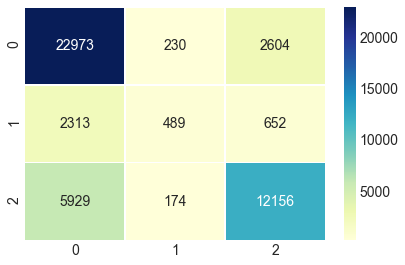

In [76]:
confusion = confusion_matrix(y_train, y_train_pred)
sns.heatmap(confusion, cmap="YlGnBu", annot=True, fmt='d', linewidths=.5);

### Overview of different models

In [79]:
clf = [LogisticRegression(solver="lbfgs"),
       KNeighborsClassifier(n_neighbors=7,weights='distance'),
       SVC(),
       DecisionTreeClassifier(random_state=RSEED),
       RandomForestClassifier(n_estimators=1000, criterion="gini",min_samples_split=10),
       ExtraTreesClassifier(random_state=RSEED, n_estimators=500, max_depth=10),
       AdaBoostClassifier(random_state=RSEED),
       GradientBoostingClassifier(random_state=RSEED),
       XGBClassifier()]

In [87]:
for model in clf:
    model_name = model.__class__.__name__
    print(model_name)
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', model)])
    clf.fit(X_train, y_train)
    model_eval(clf,X_train,X_val,y_train,y_val,model_name)
print(compare_mod)   

LogisticRegression
--
test  recall = 0.7493265993265993
train recall = 0.7537457912457912
--
test  precision = 0.7361863894968025
train precision = 0.7475420287266366
--
test  accuracy = 0.7493265993265993
train accuracy = 0.7537457912457912
--
                         precision    recall  f1-score   support

             functional       0.74      0.89      0.81      6452
functional needs repair       0.45      0.10      0.16       863
         non functional       0.79      0.67      0.72      4565

               accuracy                           0.75     11880
              macro avg       0.66      0.55      0.56     11880
           weighted avg       0.74      0.75      0.73     11880

KNeighborsClassifier
--
test  recall = 0.77996632996633
train recall = 0.9980008417508418
--
test  precision = 0.7719922909120984
train precision = 0.9980012059386455
--
test  accuracy = 0.77996632996633
train accuracy = 0.9980008417508418
--
                         precision    recall  f1-score

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [105]:
df_eval = compare_mod.T

In [121]:
df_eval.columns

Index(['test  recall', 'train recall', 'test  precision', 'train precision',
       'test  f1', 'train f1', 'test  fb=0.5', 'train fb=0.5',
       'test  accuracy', 'train accuracy'],
      dtype='object')

In [122]:
df_eval.drop(['test  fb=0.5','train fb=0.5'],1,inplace=True)

### Naive Bayes Classifier

Do not work with sparse matrix

### Random Forest

In [ ]:
# randf_ = RandomForestClassifier(random_state=42)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# clf_random = RandomizedSearchCV(estimator = randf_
#                                , param_distributions = random_grid
#                                , n_iter = 100
#                                , cv = 3
#                                , verbose=2
#                                , random_state=42
#                                , n_jobs = -1)
# # Fit the random search model
# # clf_random.fit(X_train_transformed, y_train)

In [ ]:
# joblib.dump(clf_random, "rfc_randomcv.pkl")

In [30]:
clf_random = joblib.load(MODEL_FOLDER + "rfc_randomcv.pkl")

In [31]:
print('Best score:', round(clf_random.best_score_,3))
print('Best model:', clf_random.best_params_)

Best score: 0.804
Best model: {'n_estimators': 1800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}


In [32]:
best_rfc = clf_random.best_params_

In [33]:
X_val_transformed.shape

(11880, 255)

In [34]:
X_train_transformed.shape

(47520, 255)

In [38]:
# random_pred = clf_random.predict(X_val_transformed)
# print('Validation score: ',round(accuracy_score(y_val,random_pred),3))

In [39]:
model_eval(clf_random,X_train_transformed,X_val_transformed,y_train,y_val,'RFC')

In [ ]:
compare_mod.T*100

## AdaBoost

In [ ]:
ada_log=Pipeline([('pre',preprocessor), 
              ('model',AdaBoostClassifier(base_estimator=LogisticRegression(C=0.03),
                                      random_state=RSEED))])
ada_log.fit(X_train,y_train)

In [ ]:
model_eval(ada_log,X_train,X_val,y_train,y_val,'AdaBoost Log')

In [ ]:
ada_rfc=Pipeline([('pre',preprocessor), 
              ('model',AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=1),
                                      random_state=RSEED))])
ada_rfc.fit(X_train,y_train)

In [ ]:
model_eval(ada_rfc,X_train,X_val,y_train,y_val,'AdaBoost RFC')

In [ ]:
ada_DCT=Pipeline([('pre',preprocessor), 
              ('model',AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                      random_state=RSEED))])
ada_DCT.fit(X_train,y_train)

In [ ]:
compare_mod.T

## Support Vector Classifier

## Other models?

In [114]:
def plot_result(df):
    
    """
    Function for plotting the calculated metrics for each model to compare their performance.
    """
    
    plt.rcParams['font.size'] = 14
    
    labels = df.columns.tolist()
    models = df.index.tolist()
    
    fig, ax = plt.subplots(figsize=(14,14));
    x = np.arange(0, (len(models)+2)*len(labels), len(models)+2)
    width = 0.35

    for mod in models:        
        mod_list = []
        x += 1
        for l in labels:
            mod_list.append(df.loc[mod, l]) 
        
        rects1 = ax.bar(x - width/2, mod_list, width, label=mod, alpha=1)    
        ax.set_ylabel('score');
        ax.set_title('Results');
        ax.set_ylim(0,1);
        ax.set_xticks(x-len(models)/2)
        ax.set_xticklabels(labels);
        #ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fancybox=True);
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

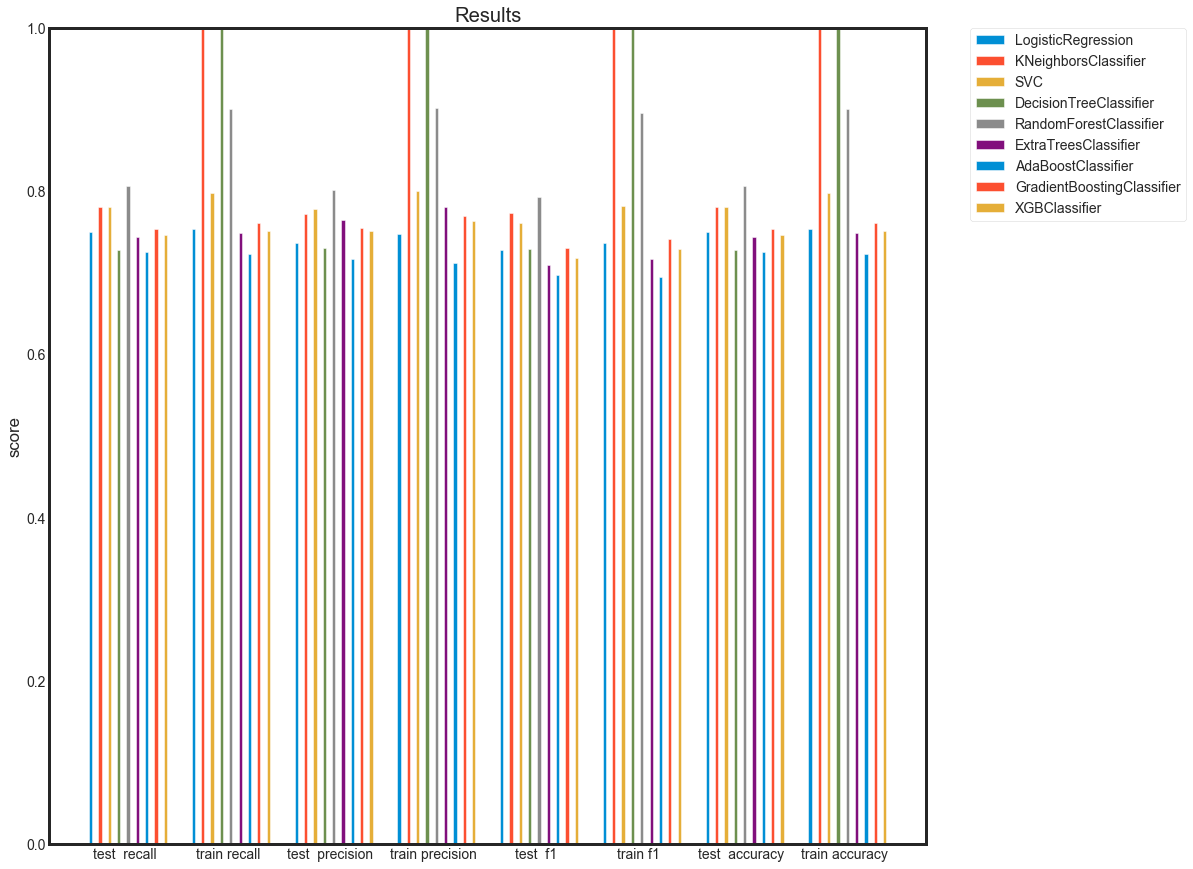

In [124]:
plot_result(df_eval)

## Playing with learning curves

In [ ]:
## from sklearn.model_selection import learning_curve
## # Create CV training and test scores for various training set sizes
## train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
##                                                         X_train_transformed, 
##                                                         y_train,
##                                                         # Number of folds in cross-validation
##                                                         cv=10,
##                                                         # Evaluation metric
##                                                         scoring='accuracy',
##                                                         # Use all computer cores
##                                                         n_jobs=-1, 
##                                                         # 50 different sizes of the training set
##                                                         train_sizes=np.linspace(0.01, 1.0, 50))
## 
## # Create means and standard deviations of training set scores
## train_mean = np.mean(train_scores, axis=1)
## train_std = np.std(train_scores, axis=1)
## 
## # Create means and standard deviations of test set scores
## test_mean = np.mean(test_scores, axis=1)
## test_std = np.std(test_scores, axis=1)
## 
## # Draw lines
## plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
## plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
## 
## # Draw bands
## plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
## plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
## 
## # Create plot
## plt.title("Learning Curve")
## plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
## plt.tight_layout()
## plt.show()

# Appendix

## Preparing Submission

In [ ]:
# submission = pd.DataFrame({'id':X_test.id,'status_group':submission_predict.astype(int)})
# submission.head()

In [ ]:
# submission.to_csv('private/submission.csv',index=False)
# submission.shape